In [21]:
%matplotlib inline

from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import sys
sys.path.append(os.path.join(os.getcwd(), os.pardir, 'src'))

%load_ext autoreload

%autoreload 2
from visualization.visualize import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load WHO Data

In [4]:
who_df = pd.read_csv(Path("../data/interim/calc_cols_added.csv"), index_col=0)
who_df.head(2)

,Iso Code,Country Name,WHO Region,Year,Vaccine Type,Admin1,Admin2,DenomType,Denominator,Numerator,Coverage,recalc_numerator,available_admin,normalized_country,indicator,group,vaccine,timing
0,AFG,Afghanistan,EMRO,2016,BCG,NaN,Aab Band,1.0,1266.0,NaN,51.801245,655.803767,Aab Band,afghanistan,1,BCG,BCG,1st_birth
1,AFG,Afghanistan,EMRO,2016,BCG,NaN,Aab Kamari,1.0,4599.0,NaN,94.674670,4354.088093,Aab Kamari,afghanistan,1,BCG,BCG,1st_birth


In [44]:
# These countries appear in both the MICS and the WHO datasets
overlaps = [
    'Benin',
    'Cameroon',
    'Cuba',
    'Dominican Republic',
    'El Salvador',
    'Guyana',
    'Kazakhstan',
    'Kyrgyzstan',
    'Malawi',
    'Mali',
    'Mexico',
    'Nepal',
    'Paraguay',
    'Sudan',
    'Swaziland',
    'Turkmenistan',
    'Zimbabwe',
]

# some MICS regions are just subsets of a country, so we
# can only analyze the ones that appear in both datasets
partial_matches = {
    'Kenya (Bungoma County)': 'Kenya',
    'Kenya (Kakamega County)': 'Kenya',
    'Kenya (Turkana County)': 'Kenya',
    'Pakistan (Punjab)': 'Pakistan',
    'Pakistan (Sindh)': 'Pakistan',
}

# Some MICS countries have their names written differently
# Thus maps the MICS version as the key to the WHO version
# as the value
overlap_map = {
    'Guinea Bissau': 'Guinea-Bissau',
    'Sao Tome and Principe': 'Sao Tome & Principe',
}

all_mics_overlaps = list(overlap_map.keys()) + list(partial_matches.keys()) + overlaps

# Load MICS Survey data

In [35]:
childrens_surveys = dict()

for f in Path("../data/interim/MICS").iterdir():
    if f.name.startswith('.'):
        continue
        
    childrens_surveys[f.stem] = pd.read_csv(f/'ch.csv', index_col=0)

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14,21,30,32,35,37,45,57,77,79,82,98,101,103,104,106,145,149,153,174,175,176,177,178,180,181,182,183,184,185,186,187,188,189,199,200,201,203,204,205,206,208,219,220,221,222,223,224,225,226,227,228,230,231,232,238,239,240,241,246,249,266,267,268,270,281,291,300) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (245,253,254,255,265,289,345) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,16,17,18,78,81,

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,16,17,18,78,81,145,152,174,177,179,181,185,187,203,205,206,207,219,226,230,232,286,314,316) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,25,103,104,105,106,107,108,176,178,183,197,198,199,202,213,214,217,229,231,233,235,240,251,253,279) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,16,17,18,19,101,102,103,170,181,193,200,264,290) have mixed types. Specify dtype option on import or set lo

# Upsample surveys based on child weights to get representative child counts

In [ ]:
all_

In [98]:
for c in to_include:
    print(c, 'HH7' in childrens_surveys[c].columns)

Benin True
Cameroon True
Cuba True
Dominican Republic True
El Salvador True
Guinea Bissau True
Guyana True
Kazakhstan True
Kyrgyzstan True
Mali True
Mexico True
Pakistan (Punjab) True
Pakistan (Sindh) True
Paraguay True
Sao Tome and Principe True
Sudan True
Swaziland True
Turkmenistan True
Zimbabwe True


In [36]:
[print(df.shape) for _, df in childrens_surveys.items()];

(874, 317)
(12362, 302)
(3482, 371)
(4611, 300)
(19285, 303)
(5663, 267)
(10223, 294)
(3346, 344)
(2773, 296)
(18108, 337)
(2728, 276)
(14751, 228)
(16468, 324)
(828, 317)
(28578, 347)
(6137, 345)
(2062, 290)
(20187, 297)
(5096, 278)
(1117, 317)
(31083, 269)
(8216, 409)
(7291, 316)
(5758, 287)
(5561, 305)
(7716, 277)
(7688, 279)
(3785, 374)
(4764, 362)


In [64]:
childrens_surveys_upsampled = dict()
for country, df in childrens_surveys.items():
    rng = np.random.RandomState(12345)
    
    w_col = 'chweight' if 'chweight' in df.columns else 'CHWEIGHT'
    
    smpl = rng.choice(df.index, 100000, p=df[w_col] / df[w_col].sum())
    childrens_surveys_upsampled[country] = df.loc[smpl, :]
    
[print(df.shape) for _, df in childrens_surveys_upsampled.items()];

(100000, 317)
(100000, 302)
(100000, 371)
(100000, 300)
(100000, 303)
(100000, 267)
(100000, 294)
(100000, 344)
(100000, 296)
(100000, 337)
(100000, 276)
(100000, 228)
(100000, 324)
(100000, 317)
(100000, 347)
(100000, 345)
(100000, 290)
(100000, 297)
(100000, 278)
(100000, 317)
(100000, 269)
(100000, 409)
(100000, 316)
(100000, 287)
(100000, 305)
(100000, 277)
(100000, 279)
(100000, 374)
(100000, 362)


In [107]:
relevant_vars = [
    # When conducted
    'UF8Y',
    
    # Where conducted (urban/rural)
    'HH6',
    'HH7',
    
    # Child Age
    'AG2',
    'CAGE',
    'AG1Y',
]

In [108]:
subsetted_dfs = []
for c in all_mics_overlaps:
    df = childrens_surveys_upsampled[c]
    im_vars = [c for c in df.columns if c.startswith('IM')]
    
    df['country'] = c
    subsetted_dfs.append(df[['country'] + im_vars + relevant_vars].copy())

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
all_mics_children_data = pd.concat(subsetted_dfs)

In [196]:
subsetted_dfs = []
for c in all_mics_overlaps:
    df = childrens_surveys[c]
    im_vars = [c for c in df.columns if c.startswith('IM')]
    
    df['country'] = c
    subsetted_dfs.append(df[['country'] + im_vars + relevant_vars].copy())

raw_mics_children_data = pd.concat(subsetted_dfs)

In [197]:
# nepal is in nepalese years...
all_mics_children_data.replace({'UF8Y': {2070.: 2013., 2071.: 2014.}}, inplace=True)
raw_mics_children_data.replace({'UF8Y': {2070.: 2013., 2071.: 2014.}}, inplace=True)

In [198]:
# just include surveys done in at least 2014
min_year = all_mics_children_data.groupby('country').UF8Y.min()
to_include = min_year[min_year >= 2014].index.tolist()

mics_children_data_who_countries = all_mics_children_data[all_mics_children_data.country.isin(to_include)]
raw_mics_children_data_who_countries = raw_mics_children_data[raw_mics_children_data.country.isin(to_include)]

print(mics_children_data_who_countries.shape)
mics_children_data_who_countries.dropna(how='all', axis=1, inplace=True)
raw_mics_children_data_who_countries = raw_mics_children_data_who_countries[mics_children_data_who_countries.columns]
print(mics_children_data_who_countries.shape)

(1900000, 359)


/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(1900000, 356)


In [199]:
country_year_map = mics_children_data_who_countries.groupby('country').UF8Y.max().to_dict()

mics_children_data_who_countries['survey_year'] = mics_children_data_who_countries.country.replace(country_year_map)
raw_mics_children_data_who_countries['survey_year'] = \
    raw_mics_children_data_who_countries.country.replace(country_year_map)

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
import json
for c in to_include:
    print(f"-------  {c}  -------")
    with open(Path(f"../data/interim/MICS/{c}/ch.json"), 'r') as f:
        all_questions = json.load(f)
        
    for col, ques in all_questions.items():
        if col.startswith('IM'):
            if 'mmr' in ques.lower() or 'measles' in ques.lower():
                print(col, ques)
                
    print("\n")

-------  Benin  -------


-------  Cameroon  -------


-------  Cuba  -------


-------  Dominican Republic  -------
IM3MD Day measles or MMR immunización
IM3MM Month Measles or MMR immunización
IM3MY Año de Measles or MMR immunización


-------  El Salvador  -------
IM3MD Día de Triple viral  MMR immunizacíon
IM3MM Mes de Triple viral  MMR immunizacíon
IM3MY Año de Triple viral  MMR immunizacíon
IM16 Niño recibió la vacuna contra el Sarampion (MMR)


-------  Guinea Bissau  -------
IM3MD Dia vacinação de Sarampo/MMR
IM3MM Mês vacinação de Sarampo/MMR
IM3MY Ano vacinação de Sarampo/MMR


-------  Guyana  -------
IM3MD Day measles or MMR immunization
IM3MM Month Measles or MMR immunization
IM3MY Year of Measles or MMR immunization
IM16 Child ever given Measles or MMR vaccination


-------  Kazakhstan  -------
IM3MD Day of Measles or MMR immunization
IM3MM Month of Measles or MMR immunization
IM3MY Year of Measles or MMR immunization
IM16 Child ever given Measles or MMR vaccination


---

In [200]:
from collections import namedtuple

Vax = namedtuple('Vax',
                 ['name',           # Group name
                  'doses_dict',     # map standard WHO dose names to year columns
                  'ever_col',       # yes/no for vax ever given 
                  'ever_col_year']) # year for vax ever given

vaxes = [
    Vax(name='BCG',
        doses_dict={'BCG': ['IM3BY']},
        ever_col=['IM7'],
        ever_col_year=[]),
    
    # DTP or Penta
    Vax(name='DTP',
        doses_dict={'DTP1': ['IM3D1Y', 'IM3PV1Y'],
                    'DTP2': ['IM3D2Y', 'IM3PV2Y'],
                    'DTP3': ['IM3D3Y', 'IM3PV3Y'],
                    'DTP4': ['IM3D4Y', 'IM3PV4Y']},
        ever_col=['IM17', 'IM17A', 'IM11', 'IM10A', 'IM11A'],
        ever_col_year=[]),
    
    Vax(name='Measles',
        doses_dict={'MCV1': ['IM3M1Y'],
                    'MCV2': ['IM3M2Y']},
        ever_col=['IM16'],
        ever_col_year=['IM3MY']),
    
# polio
# flu/Hib
# hepb
# pneumo / PCV
]

In [171]:
# Harmonize "ever" questions:
ever_harmonize_map = {
    # yes
    'First two weeks': 1.0,
    'First eight weeks': 1.0,
    'Dans les 2 premières semaines': 1.0,
    'Later': 1.0,
    'Plus tard': 1.0,
    'Sim': 1.0,
    'Si': 1.0,
    'Sí': 1.0,
    'Oui': 1.0,
    'Yes': 1.0,
    '1.0': 1.0,
    '2.0': 1.0,
    '3.0': 1.0,
    '4.0': 1.0,
    '5.0': 1.0,
    '6.0': 1.0,
     2.0: 1.0,
     3.0: 1.0,
     4.0: 1.0,
     '2009.0': 1.0,
     '2010.0': 1.0,
     '2011.0': 1.0,
     '2012.0': 1.0,
     '2013.0': 1.0,
     '2014.0': 1.0,
     '2015.0': 1.0,
     '2016.0': 1.0,
     2013.0: 1.0,
     2014.0: 1.0,
     2015.0: 1.0,
     2016.0: 1.0,  
    'Dans carte de vaccination': 1.0,
    'Déclaration de la mère': 1.0,
    'Madre reportada': 1.0,
    'Reporte de la madre': 1.0,
    'Réponse de la mère': 1.0,
    'Marcada en la tarjeta': 1.0,
    'Marcada sobre la tarjeta': 1.0,
    'Marked on card': 1.0,
    'Marqué sur le carnet': 1.0,
    'Mother reported': 1.0,
    
    # no
    'Non': 0.0,
    'NÃ£o': 0.0,
    'No': 0.0,
    'No aplicada': 0.0,
    'No vacunado': 0.0,
    'Pas reçue/pas vue dans le carnet': 0.0,
    
    # don't know
    'DK': np.nan,
    'Manquant': np.nan,
    'Non déclaré/Pas de réponse': np.nan,
    'Ne sait pas': np.nan,
    'Missing': np.nan,
    'Em falta': np.nan,
    'Incohérent': np.nan,
    'Inconsistent': np.nan,
    'Inconsistente': np.nan,
    'NS': np.nan,
    'NSP': np.nan,
    'No dada': np.nan,
    'No sabe': np.nan,
    'Not given': np.nan,
    'NÃ£o Sabe': np.nan,
    'Omitido': np.nan,
    'Pas donné': np.nan,
}

# for v in vaxes:
#     all_answers = set()
#     for ever_col in v.ever_col:
#         all_answers = all_answers | set(mics_children_data_who_countries[ever_col].unique().tolist())
        
# all_answers

In [201]:
vaxed_data = mics_children_data_who_countries.copy()
raw_vaxed_data = raw_mics_children_data_who_countries.copy()

In [219]:
all_cols_added = dict()

for ix, yr in enumerate(list(range(2016, 2013, -1))):
    
    all_cols_added[yr] = [f"denom_{yr}"]
    
    # calc denominator
    vaxed_data[f"denom_{yr}"] = vaxed_data.AG1Y == yr
    raw_vaxed_data[f"denom_{yr}"] = raw_vaxed_data.AG1Y == yr

    for v in vaxes:
        
        cols_added = []
        
        print(v.name)
        
        # track individual doses
        for dose_name, dose_cols in v.doses_dict.items():
            print(dose_name)
            
            new_col = f"{dose_name}_{yr}"
            vaxed_data[new_col] = (vaxed_data[dose_cols] == yr).any(axis=1) & vaxed_data[f"denom_{yr}"]
            raw_vaxed_data[new_col] = (raw_vaxed_data[dose_cols] == yr).any(axis=1) & raw_vaxed_data[f"denom_{yr}"]
            
            cols_added.append(new_col)
        
        # track ever based on ever_col or individual doses
        new_col = f"{v.name}_any_dose_{yr}"
        
        vaxed_data[new_col] = (((vaxed_data[cols_added] == 1.0).any(axis=1) | 
                                (vaxed_data[v.ever_col_year] == yr).any(axis=1) | 
                                (vaxed_data[v.ever_col].replace(ever_harmonize_map) == 1.0).any(axis=1)) &
                               vaxed_data[f"denom_{yr}"])
        
        raw_vaxed_data[new_col] = (((raw_vaxed_data[cols_added] == 1.0).any(axis=1) | 
                        (raw_vaxed_data[v.ever_col_year] == yr).any(axis=1) | 
                        (raw_vaxed_data[v.ever_col].replace(ever_harmonize_map) == 1.0).any(axis=1)) &
                       raw_vaxed_data[f"denom_{yr}"])

        all_cols_added[yr] += cols_added + [new_col]

BCG
BCG
DTP
DTP1
DTP2
DTP3
DTP4
Measles
MCV1
MCV2
BCG
BCG
DTP
DTP1
DTP2
DTP3
DTP4
Measles
MCV1
MCV2
BCG
BCG
DTP
DTP1
DTP2
DTP3
DTP4
Measles
MCV1
MCV2


In [244]:
coverage_dfs = []
for yr in [2014, 2015, 2016]:    
    sampled_data = (vaxed_data.groupby(['country', 'HH7'])[all_cols_added[yr]].sum())

    raw_data = (raw_vaxed_data.groupby(['country', 'HH7'])[all_cols_added[yr]].sum()) 
    
    # calculate coverage
    cov_percentages = sampled_data.divide(sampled_data[f"denom_{yr}"], axis=0)    

    # only show data where we talked to enough kids
    mics_to_compare = cov_percentages.loc[raw_data[f"denom_{yr}"] >= 30, :].reset_index()

    coverage_dfs.append(mics_to_compare)

In [ ]:
### Create immunization value counts

In [306]:
who = pd.read_csv(Path("../data/interim/calc_cols_added.csv"), index_col=0)

coverage_by_Admin1 = (who.groupby(['Country Name', 'Admin1', 'Vaccine Type'])
                                    [['recalc_numerator', 'Denominator']]
                                    .sum()
                                    .pipe(lambda x: x.recalc_numerator / x.Denominator)
                                    .unstack())

coverage_by_Admin1.reset_index(inplace=True)
coverage_by_Admin1

Vaccine Type,Country Name,Admin1,BCG,DTP1,DTP2,DTP3,DTP4,HepB1,HepB2,HepB3,...,Pol2,Pol3,RCV1,RCV2,Rota1,RotaC,TT2plus,VAD1,Varicella,YFV
0,Algeria,Adrar,0.960000,0.910063,NaN,0.870000,0.000000,NaN,NaN,0.870000,...,NaN,0.870000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
1,Algeria,Alger,1.000000,0.944007,NaN,0.900000,0.000000,NaN,NaN,0.900000,...,NaN,0.900000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
2,Algeria,Annaba,0.990000,0.935728,NaN,0.880000,0.000000,NaN,NaN,0.880000,...,NaN,0.880000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
3,Algeria,Aïn-Defla,1.000000,0.995468,NaN,0.940000,0.000000,NaN,NaN,0.940000,...,NaN,0.940000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
4,Algeria,Aïn-Temouchent,1.000000,0.985076,NaN,0.930000,0.000000,NaN,NaN,0.930000,...,NaN,0.930000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
5,Algeria,Batna,0.990000,0.978680,NaN,0.890000,0.000000,NaN,NaN,0.890000,...,NaN,0.890000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
6,Algeria,Bejaïa,1.000000,0.993543,NaN,0.910000,0.000000,NaN,NaN,0.910000,...,NaN,0.910000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
7,Algeria,Biskra,0.990000,0.977335,NaN,0.880000,0.000000,NaN,NaN,0.880000,...,NaN,0.880000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
8,Algeria,Blida,1.000000,0.973586,NaN,0.930000,0.000000,NaN,NaN,0.930000,...,NaN,0.930000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0
9,Algeria,Bordj-Bou-Arreridj,0.990000,0.949230,NaN,0.940000,0.000000,NaN,NaN,0.940000,...,NaN,0.940000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.0


In [307]:
from unidecode import unidecode

def clean_geo_names(x):
    x = unidecode(x.strip().upper())
    x = x.replace("-", " ")
    return x

In [372]:
yr=2014
df=coverage_dfs[0]

subset_who = coverage_by_Admin1[coverage_by_Admin1['Country Name'].isin(df.country.unique())]
subset_who['Admin1'] = subset_who['Admin1'].apply(clean_geo_names)


subset_who.columns = [f"{c}_{yr}" for c in subset_who.columns]
subset_who.rename(columns={f'Country Name_{yr}': 'country', f'Admin1_{yr}': 'HH7'}, inplace=True)


df.HH7 = df.HH7.apply(clean_geo_names)

shared_regions = np.intersect1d(df.HH7.unique(), subset_who.HH7.unique())

df = df.sort_values(['country', 'HH7'])[df.HH7.isin(shared_regions)]
subset_who = subset_who[subset_who.HH7.isin(shared_regions)].sort_values(['country', 'HH7'])

/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/bull/anaconda3/envs/subnational-vaccines/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


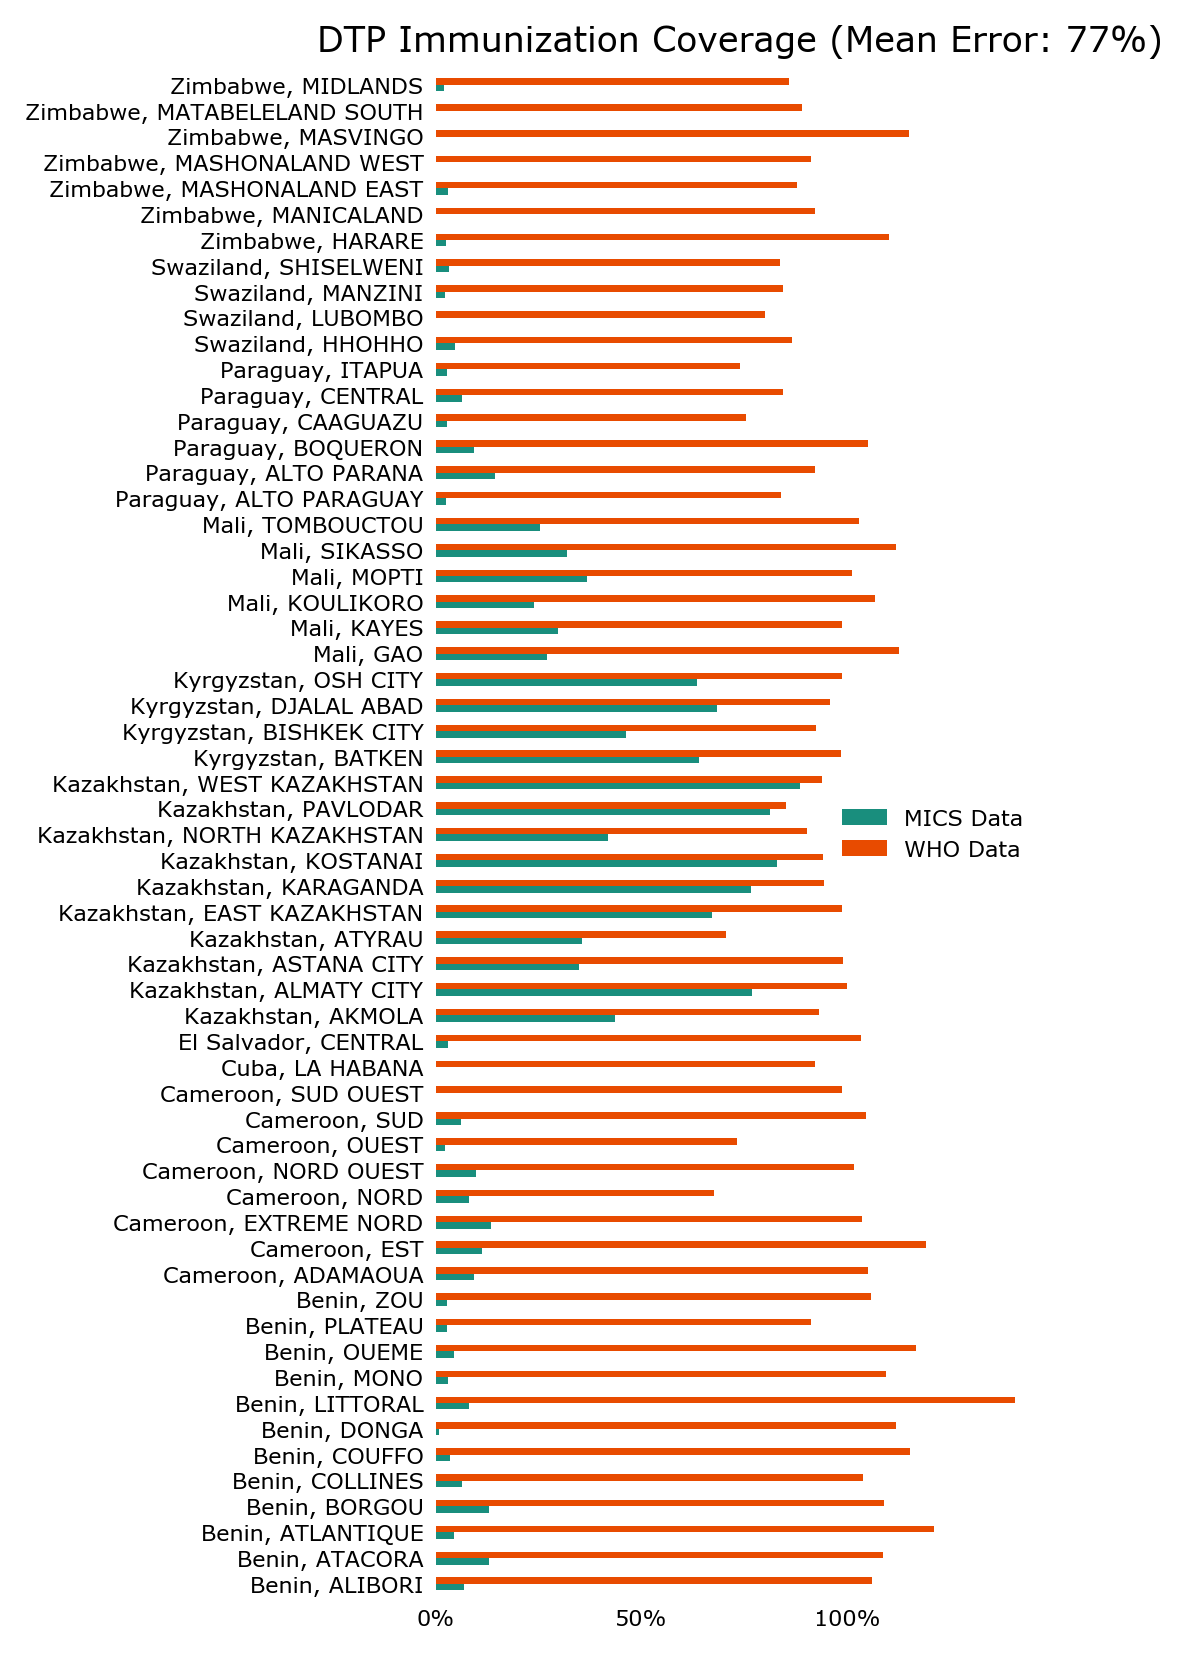

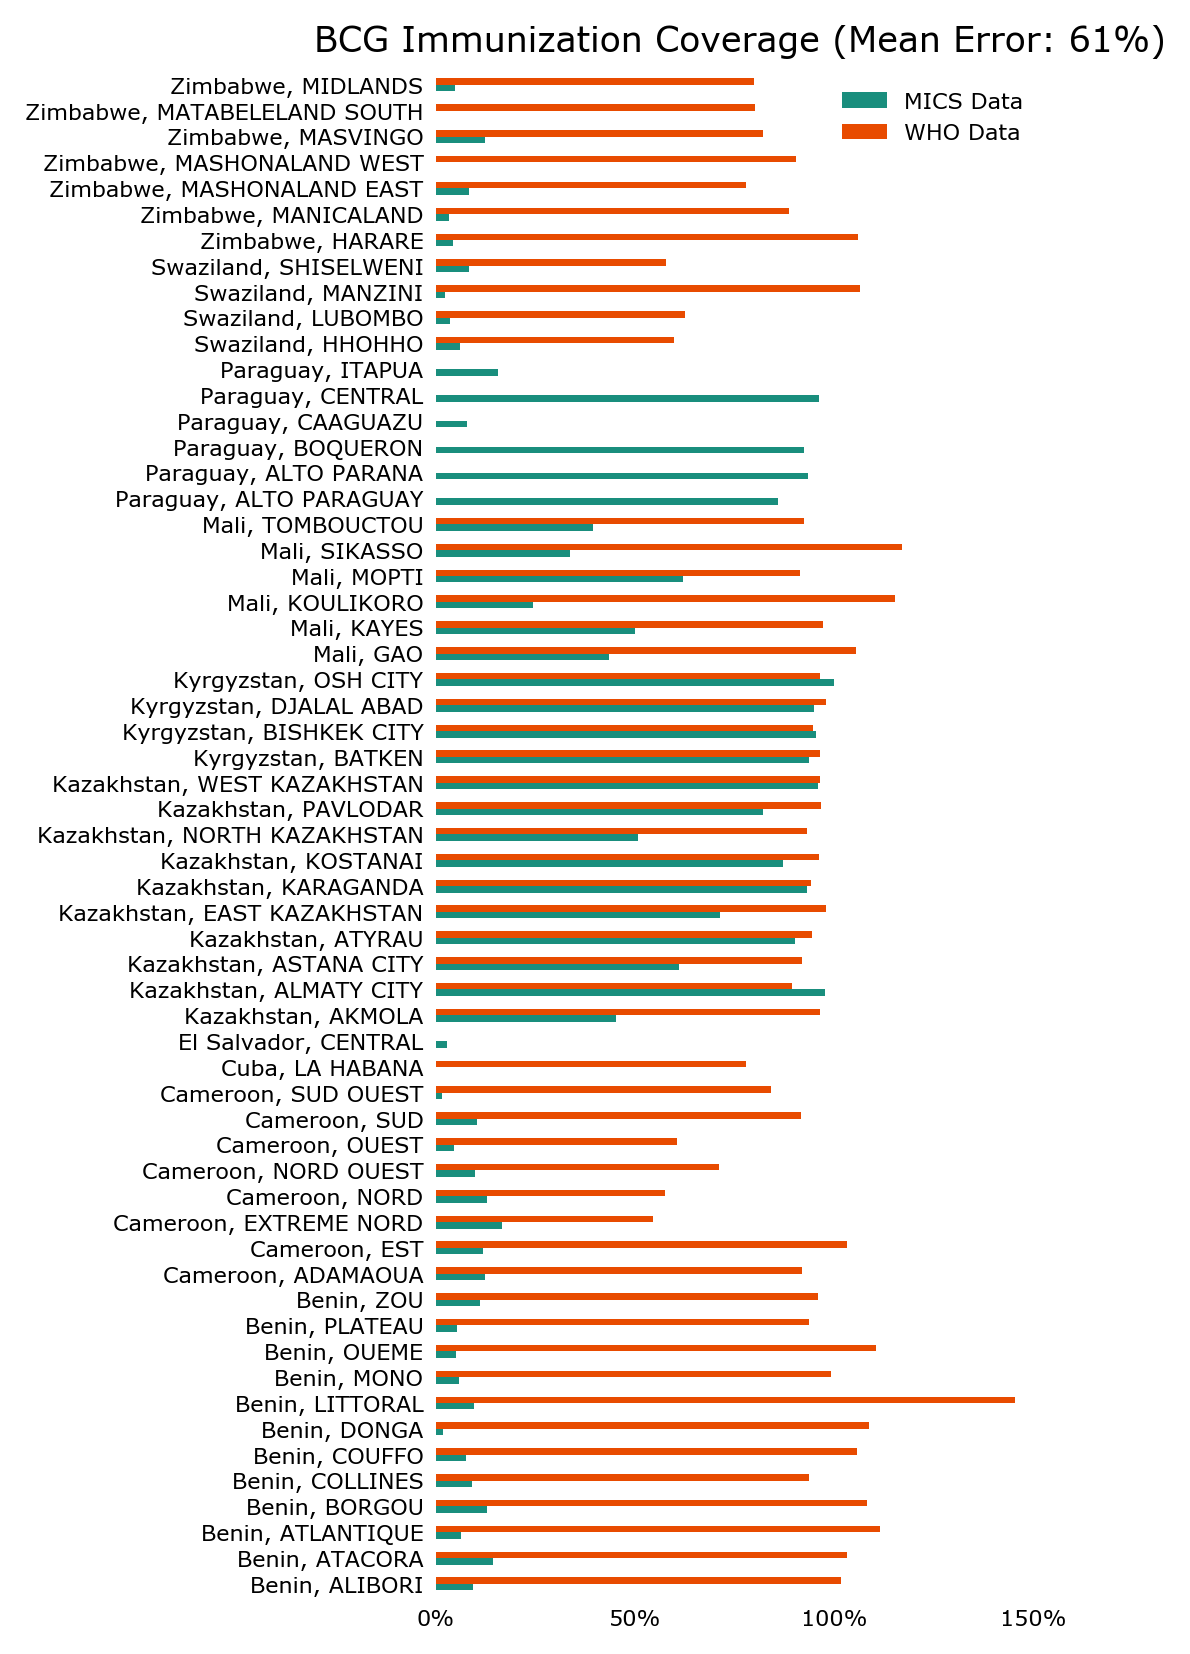

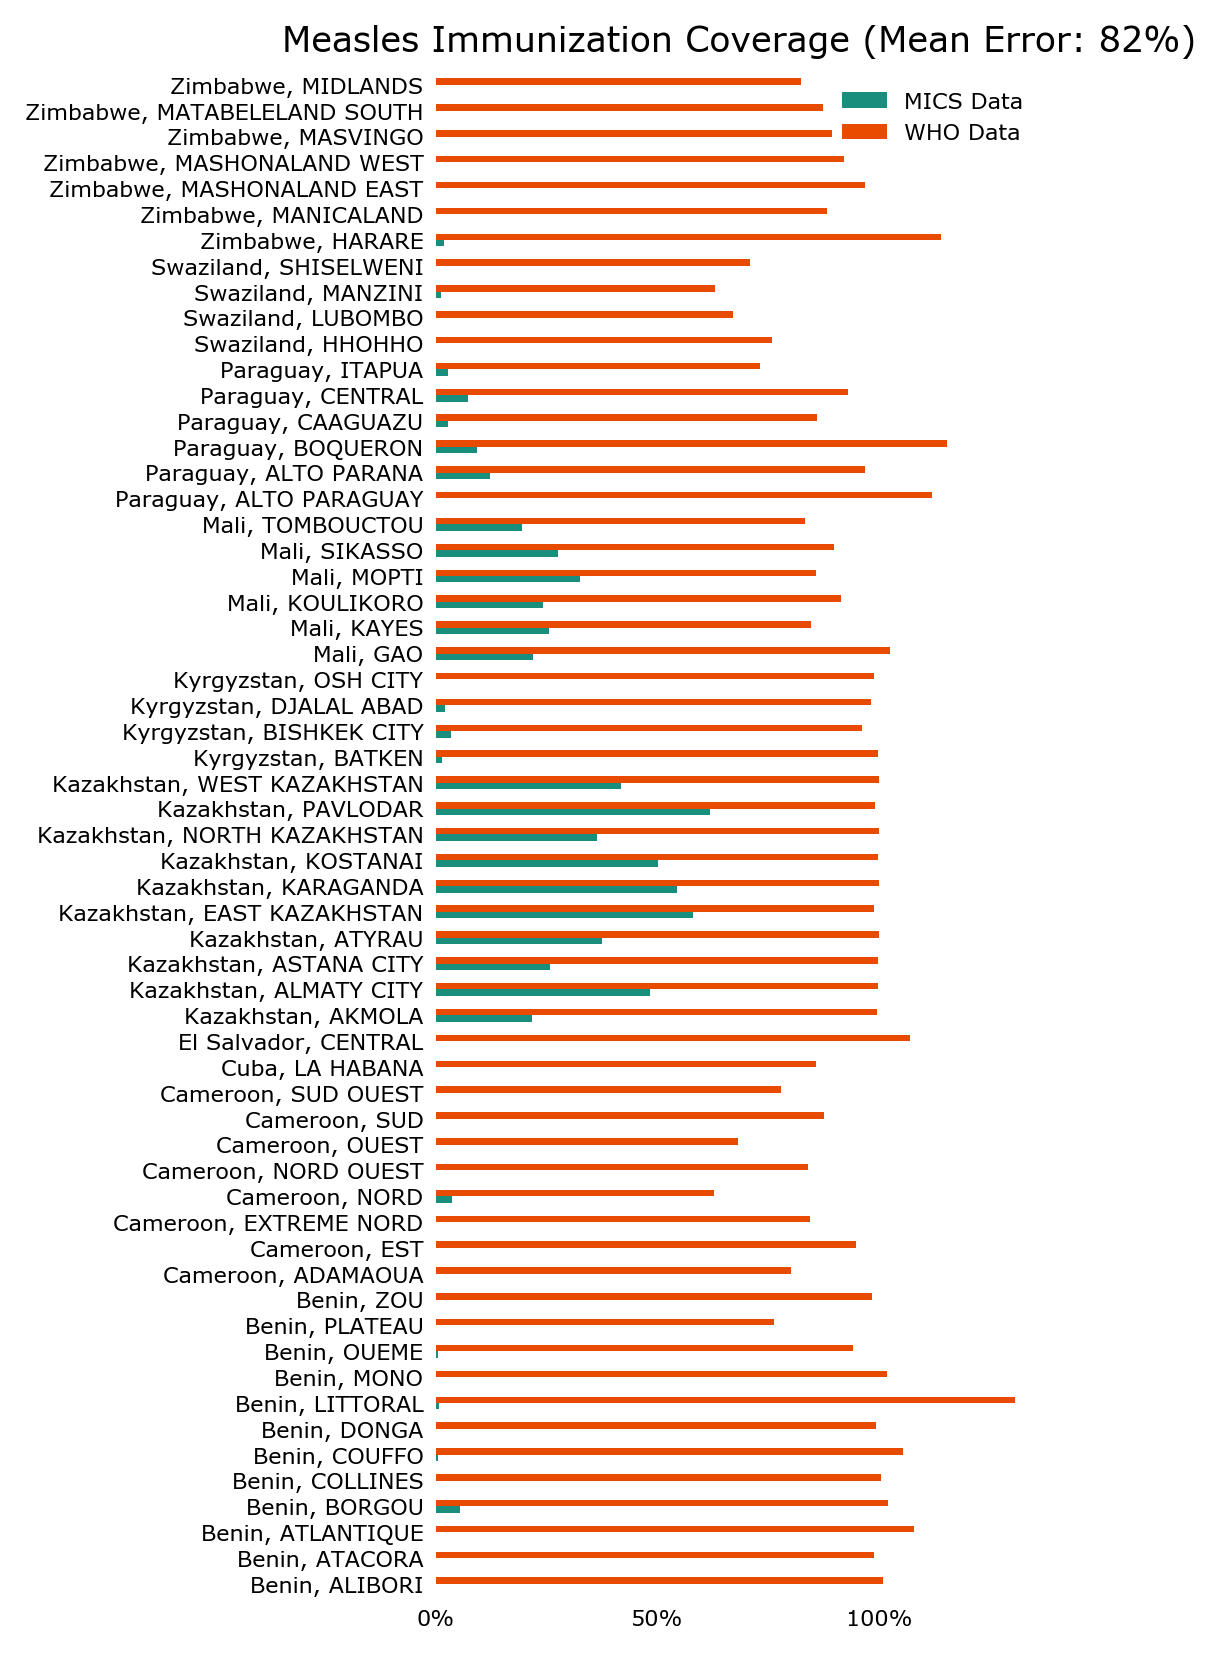

In [376]:
plot_together = [
    ('DTP', 'DTP_any_dose', "DTP Immunization Coverage"),
    ('BCG', 'BCG_any_dose', "BCG Immunization Coverage"),
    ('MCV', 'Measles_any_dose', "Measles Immunization Coverage"),
]


for who_prefix, mics_prefix, title in plot_together:
    to_plot = pd.DataFrame({
        'WHO Data': subset_who[[c for c in subset_who.columns if c.startswith(who_prefix)]].max(axis=1).values,
        'MICS Data': df[[c for c in df.columns if c.startswith(mics_prefix)]].max(axis=1).values,
        },
        index=(df.country + ", " + df.HH7).values
    )
    
    with styled_fig_ax(size='custom', font_size=8, x_formatter=pct_func_formatter(), zero_lines=False,
                       other_rc_params={'figure.figsize': (3, 6.5)}) as ax:
        to_plot.plot.barh(ax=ax)
        av_err = to_plot.diff(axis=1).abs().mean().values[1]
        ax.set_title(title + " (Mean Error: {:.0f}%)".format(av_err*100))

    

In [334]:
df

,country,HH7,denom_2015,BCG_2015,BCG_any_dose_2015,DTP1_2015,DTP2_2015,DTP3_2015,DTP4_2015,DTP_any_dose_2015,MCV1_2015,MCV2_2015,Measles_any_dose_2015
0,Kazakhstan,AKMOLA,1.0,0.000000,0.453039,0.000000,0.0,0.0,0.0,0.308011,0.0,0.0,0.070442
2,Kazakhstan,ALMATY CITY,1.0,0.000000,0.945819,0.000000,0.0,0.0,0.0,0.441696,0.0,0.0,0.010601
4,Kazakhstan,ASTANA CITY,1.0,0.000000,0.428981,0.000000,0.0,0.0,0.0,0.136298,0.0,0.0,0.022956
5,Kazakhstan,ATYRAU,1.0,0.000000,0.745917,0.000000,0.0,0.0,0.0,0.185118,0.0,0.0,0.105263
6,Kazakhstan,EAST KAZAKHSTAN,1.0,0.000000,0.907463,0.000000,0.0,0.0,0.0,0.608955,0.0,0.0,0.253731
7,Kazakhstan,KARAGANDA,1.0,0.078167,0.730458,0.000000,0.0,0.0,0.0,0.438005,0.0,0.0,0.025606
8,Kazakhstan,KOSTANAI,1.0,0.070423,0.907445,0.000000,0.0,0.0,0.0,0.484909,0.0,0.0,0.086519
11,Kazakhstan,PAVLODAR,1.0,0.000000,0.851852,0.000000,0.0,0.0,0.0,0.500000,0.0,0.0,0.328042
13,Kazakhstan,WEST KAZAKHSTAN,1.0,0.000000,0.901639,0.000000,0.0,0.0,0.0,0.627422,0.0,0.0,0.023845
15,Mali,GAO,1.0,0.332425,0.520436,0.000000,0.0,0.0,0.0,0.160763,0.0,0.0,0.043597


In [326]:
subset_who

,country,HH7,BCG_2016,DTP1_2016,DTP2_2016,DTP3_2016,DTP4_2016,HepB1_2016,HepB2_2016,HepB3_2016,...,Pol2_2016,Pol3_2016,RCV1_2016,RCV2_2016,Rota1_2016,RotaC_2016,TT2plus_2016,VAD1_2016,Varicella_2016,YFV_2016
1316,Paraguay,ALTO PARANA,NaN,0.920524,NaN,0.852470,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319,Paraguay,CAAGUAZU,NaN,0.752839,NaN,0.738600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1323,Paraguay,CENTRAL,NaN,0.843272,NaN,0.806035,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,Paraguay,ITAPUA,NaN,0.710572,NaN,0.739117,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
